# Wrangle and Analyze Data Project

## 1. Gather Data

In [4]:
# Load packages
import tweepy
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import os
import requests
from PIL import Image
from io import BytesIO
import json

### The WeRateDogs Twitter archive

In [5]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Predictions

In [7]:
tweet_image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(tweet_image_prediction_url)
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

### Tweet's Data Stats

In [8]:
# consumer_key, consumer_secret, access_token and access_secret should be achieved
# by creating a twitter account and twitter app on https://apps.twitter.com/app

# consumer_key = 'YOUR CONSUMER KEY'
# consumer_secret = 'YOUR CONSUMER SECRET'
# access_token = 'YOUR ACCESS TOKEN'
# access_secret = 'YOUR ACCESS SECRET'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
# Use this for retrive json data
# with open('tweet_json.txt', 'w') as outfile:  
#     data = []
#     for id in twitter_archive_enhanced['tweet_id']:
#         try:
#             tweet = api.get_status(id, tweet_mode='extended')
#             data.append(tweet._json)
#         except:
#             pass
#     json.dump(data, outfile)


In [10]:
# Test if data was written successfully
with open('tweet_json.txt') as json_file:  
    data = json.load(json_file)
    for tweet in data[:4]:
        print(tweet)

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [11]:
# read json file
tweets = pd.read_json('tweet_json.txt')

In [12]:
tweets.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2344,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",110,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,0.0,NaN,NaN,NaN,40,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2345,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",306,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,0.0,NaN,NaN,NaN,143,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2346,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",127,False,Here is a very happy pup. Big fan of well-main...,NaN,...,0.0,NaN,NaN,NaN,46,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2347,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",131,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,0.0,NaN,NaN,NaN,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2348,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2531,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,0.0,NaN,NaN,NaN,527,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [13]:
tweets.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2349.000000,0.0,2.349000e+03,2.349000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2208.0,2208.0,2.900000e+01,2.900000e+01,2349.000000
mean,NaN,NaN,8109.720732,NaN,7.424674e+17,7.424674e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3097.263942
std,NaN,NaN,12051.729881,NaN,6.840987e+16,6.840987e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5133.834333
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783890e+17,6.783890e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,615.000000
50%,NaN,NaN,3585.000000,NaN,7.193325e+17,7.193325e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1445.000000
75%,NaN,NaN,10100.000000,NaN,7.989257e+17,7.989257e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3606.000000
max,NaN,NaN,131820.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,78754.000000


In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 0 to 2348
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2349 non-null datetime64[ns]
display_text_range               2349 non-null object
entities                         2349 non-null object
extended_entities                2070 non-null object
favorite_count                   2349 non-null int64
favorited                        2349 non-null bool
full_text                        2349 non-null object
geo                              0 non-null float64
id                               2349 non-null int64
id_str                           2349 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [15]:
# Keep only tweet ID, retweet count, and favorite count
tweets = tweets[['user', 'favorite_count', 'retweet_count']]

In [16]:
tweets.head()

,user,favorite_count,retweet_count
0,"{'id': 4196983835, 'id_str': '4196983835', 'na...",39334,8786
1,"{'id': 4196983835, 'id_str': '4196983835', 'na...",33671,6439
2,"{'id': 4196983835, 'id_str': '4196983835', 'na...",25363,4270
3,"{'id': 4196983835, 'id_str': '4196983835', 'na...",42708,8877
4,"{'id': 4196983835, 'id_str': '4196983835', 'na...",40850,9654


## 2. Assessing Data

In [17]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality Issues
twitter_archive_enhanced:
- We don't need reply tweets
- We don't need retweets
- Wrong time format
- Some expanded urls are missing
- Uncorrect rating compared with text
- Missing Name
- Unclear tag(doggo, floofer, pupper, puppo)
- Source should not include link

### Tidyness
twitter_archive_enhanced:
- Unuseful dog tag

tweets
- User id displayed in wrong format

## Cleaning Data

### Quality

In [18]:
# Make a copy of twitter_archive_enhanced
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()

In [19]:
# 1. Remove the reply tweets and drop in_reply_to_status_id and in_reply_to_user_id column
# only keep the tweets that in_reply_to_user_id is NA then drop the two columns
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.in_reply_to_user_id.isna()]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1)

In [20]:
# 2. Remove the reply retweets and drop retweeted_status_id, 
# retweeted_status_user_id and retweeted_status_timestamp column
# only keep the tweets that retweeted_status_id is NA then drop the two columns
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isna()]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

In [21]:
# 3. Correct format of timestamp 
# use to_datetime function to clean timestamp column
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])

In [22]:
# 4 & 5. Uncorrect rating and extract short url instead of using the expanded url
from fractions import Fraction
def clean_ratings_and_urls(twitter_archive_enhanced_clean):
    # achieve the text from text column
    text = twitter_archive_enhanced_clean.text
    # replace \n \t , with space
    text = text.replace('\n', ' ')
    text = text.replace('\t', ' ')
    text = text.replace(',', ' ')   
    # split the text with space for further extraction
    text = text.split(' ')
    # set up the numerator and denominator for extract ratings
    numerator, denominator, url = 0, 0, None
    for s in text:
    # for string in text list, if 't.co' in string means it's a url
        if 't.co' in s:
            url = s
        else:
            try:
                # try to put string into fucntion fraction, if the string can be 
                # evaluated as a rational number, then we can get numerator and denominator
                num = Fraction(s)
                numerator = num.numerator
                denominator = num.denominator
                # change the base ratings to 10 
                if denominator != 10:
                    numerator *= 10/denominator
                    denominator = 10
            except:
                pass
    # update numerator, denominator, and url
    twitter_archive_enhanced_clean['rating_numerator'] = int(numerator)
    twitter_archive_enhanced_clean['rating_denominator'] = denominator
    twitter_archive_enhanced_clean['url'] = url 
    return twitter_archive_enhanced_clean

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.apply(clean_ratings_and_urls, axis = 1)


In [23]:
# 6. Missing Name
def clean_dog_name(twitter_archive_enhanced_clean):
    # change all the wrong names to unknown
    if twitter_archive_enhanced_clean['name'].islower():
        return 'Unknown'
    elif twitter_archive_enhanced_clean['name'] == 'None':
        return 'Unknown'
    else:
        return twitter_archive_enhanced_clean['name']
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean.apply(clean_dog_name, axis = 1) 

twitter_archive_enhanced_clean.tail(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url
2306,666835007768551424,2015-11-18 04:27:09,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,https://twitter.com/dog_rates/status/666835007...,10,10,Unknown,None,None,None,None,https://t.co/ZnEMHBsAs1
2307,666826780179869698,2015-11-18 03:54:28,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,https://twitter.com/dog_rates/status/666826780...,12,10,Unknown,None,None,None,None,https://t.co/V6ZzG45zzG
2308,666817836334096384,2015-11-18 03:18:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He is a German Boston Shuttlecoc...,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,None,None,None,None,https://t.co/8whlkYw3mO
2309,666804364988780544,2015-11-18 02:25:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None,https://t.co/RdKbAOEpDK
2310,666786068205871104,2015-11-18 01:12:41,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,https://twitter.com/dog_rates/status/666786068...,2,10,Unknown,None,None,None,None,https://t.co/EIn5kElY1S
2311,666781792255496192,2015-11-18 00:55:42,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,https://twitter.com/dog_rates/status/666781792...,10,10,Unknown,None,None,None,None,https://t.co/uEvsGLOFHa
2312,666776908487630848,2015-11-18 00:36:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Josep. He is a Rye Manganese mix. Can ...,https://twitter.com/dog_rates/status/666776908...,5,10,Josep,None,None,None,None,https://t.co/XNGeDwrtYH
2313,666739327293083650,2015-11-17 22:06:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,https://twitter.com/dog_rates/status/666739327...,10,10,Lugan,None,None,None,None,https://t.co/tI3uFLDHBI
2314,666701168228331520,2015-11-17 19:35:19,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,https://twitter.com/dog_rates/status/666701168...,8,10,Unknown,None,None,None,None,https://t.co/uQbZJM2DQB
2315,666691418707132416,2015-11-17 18:56:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None,https://t.co/bg4TqvvkuF


In [24]:
# 7. Take a look at twitter_archive_enhanced data, we can find all
# data are either none or same as column name, we can change it to 
# 0 as none or 1 as indicated by column name
for col in ['doggo', 'floofer', 'pupper', 'puppo']:
    # set all these columns to zero
    twitter_archive_enhanced_clean[col] = 0
    # for those has same column name as entry, create a mask
    mask = twitter_archive_enhanced[col] == col
    # apply the mask
    twitter_archive_enhanced_clean.loc[mask, col] = 1

In [25]:
# 8. Source should not include link
def clean_source(twitter_archive_enhanced_clean):
    # extract the source text
    text = twitter_archive_enhanced_clean.source
    try:
        # if '>' is found, means the source is in [left+1:-4]
        left = text.find('>')
        return text[left+1:-4]
    except:
        return 'Unknown'

twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean.apply(clean_source, axis = 1)

In [26]:
twitter_archive_enhanced_clean.head(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,0,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,0,0,0,0,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,0,0,0,0,https://t.co/AtUZn91f7f
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,Unknown,0,0,0,0,https://t.co/kQ04fDDRmh
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,0,0,0,0,https://t.co/tVJBRMnhxl
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,Unknown,0,0,0,0,https://t.co/v0nONBcwxq
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,0,0,0,0,https://t.co/9TwLuAGH0b
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1,0,0,0,https://t.co/t1bfwz5S2A


### Tidyness

In [27]:
# 1. Unuseful dog tag doggo floofer pupper puppo, remove those columns
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1)
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f


In [28]:
# 2. Clean user id in tweets data
tweets_clean = tweets.copy()

In [29]:
from pandas.io.json import json_normalize
# use json_normalize to extract a tidy form of tweets_clean['user']
user_info = json_normalize(tweets_clean['user'])
user_info.columns

Index(['contributors_enabled', 'created_at', 'default_profile',
       'default_profile_image', 'description', 'entities.description.urls',
       'entities.url.urls', 'favourites_count', 'follow_request_sent',
       'followers_count', 'following', 'friends_count', 'geo_enabled',
       'has_extended_profile', 'id', 'id_str', 'is_translation_enabled',
       'is_translator', 'lang', 'listed_count', 'location', 'name',
       'notifications', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_banner_url', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image', 'protected',
       'screen_name', 'statuses_count', 'time_zone', 'translator_type', 'url',
       'utc_offset', 'verified'],
      dtype='object')

In [30]:
# update tweets_clean['user'] to id only
tweets_clean['user'] = user_info['id']
tweets_clean.head()

,user,favorite_count,retweet_count
0,4196983835,39334,8786
1,4196983835,33671,6439
2,4196983835,25363,4270
3,4196983835,42708,8877
4,4196983835,40850,9654


## 4. Storing, Analyzing, and Visualizing Data for this Project

#### Store twitter_archive_enhanced_clean to csv

In [31]:
twitter_archive_enhanced_clean.to_csv('twitter_archive_master.csv')
tweets_clean.to_csv('tweets_stats.csv')

#### Insights

In [32]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
url                   2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.8+ KB


In [33]:
twitter_archive_enhanced_clean.timestamp.max

<bound method Series.max of 0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
31     2017-07-15 16:17:19
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36


Insights 1: There are 2097 original tweets from WeRateDogs after we wrangle the data

In [34]:
tweets_clean.describe()

,user,favorite_count,retweet_count
count,2.349000e+03,2349.000000,2349.000000
mean,4.196984e+09,8109.720732,3097.263942
std,0.000000e+00,12051.729881,5133.834333
min,4.196984e+09,0.000000,0.000000
25%,4.196984e+09,1415.000000,615.000000
50%,4.196984e+09,3585.000000,1445.000000
75%,4.196984e+09,10100.000000,3606.000000
max,4.196984e+09,131820.000000,78754.000000


Insights 2: The maximum favorite count is 131820 and retweet count is 78754, and minimum for both is 0. 

Insights 3: The mean of favorite count is 8110 and mean of retweet count is 3097.

#### Visualization

In [38]:
# Use seaborn package to draw boxplot of tweets data to visualize it.
import seaborn as sns
import matplotlib as plt
%matplotlib inline

[Text(0,0.5,'favorite_tweets')]

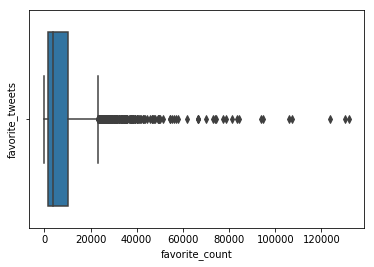

In [40]:
ax1 = sns.boxplot(x = tweets_clean['favorite_count'])
ax1.set(ylabel = 'favorite_tweets')

[Text(0,0.5,'tetweet_tweets')]

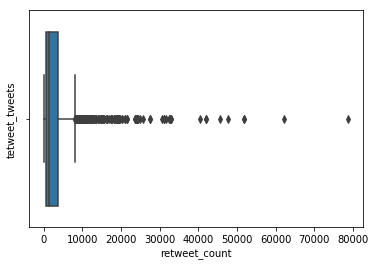

In [41]:
ax2 = sns.boxplot(x = tweets_clean['retweet_count'])
ax2.set(ylabel = 'tetweet_tweets')